In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [44]:
DM_data = pd.read_csv('../raw_data/diabetic_data.csv')

In [45]:
#DM_data.info()

In [46]:
#DM_data.isnull().sum()

In [47]:
#DM_data.head()

In [48]:
# ei = len(DM_data['patient_nbr'].value_counts())
# ei
DM_data['weight'].value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [49]:
#There is no missing value in our data but upon observing the weight column, 97% of its values are '?', 
#so I will drop weight column. But before that, I will try to find if other columns have '?' as well.

In [50]:
columns_with_questionmark = []
for col in DM_data.columns: 
    if '?' in DM_data[col].values:
        columns_with_questionmark.append(col)    
print(columns_with_questionmark)    

['race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']


C:\Users\14322\AppData\Local\Temp/ipykernel_2608/154103688.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if '?' in DM_data[col].values:


In [51]:
#calculating percentage of '?' values in columns where it is found.
col_names = ['race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']
cols = {}
for col in col_names:
    length = len(DM_data[DM_data[col] == '?'])
    per = length / DM_data.shape[0]
    cols[col] = per
#print(cols)  
df = pd.DataFrame(cols.items(), columns = ['column_name', '% of \'?\''])
df.sort_values(by = '% of \'?\'', ascending=False)

,column_name,% of '?'
1,weight,0.968585
3,medical_specialty,0.490822
2,payer_code,0.395574
0,race,0.022336
6,diag_3,0.013983
5,diag_2,0.003518
4,diag_1,0.000206


In [52]:
# here we see more than 39% of their values are '?'  in payer_code, medical_speciality, and  weight.

In [53]:
DM_data.drop(columns='weight',inplace=True)

In [54]:
#DM_data.head()
#dropping columns with high percentage of missing values, and columns with no relevant data to predict readmission
#such as encounter_id,patient_nbr
#DM_data.drop(columns='payer_code','medical_speciality',inplace=True)

In [55]:
len(DM_data['patient_nbr'].unique())

71518

In [56]:
DM_data.set_index('patient_nbr', inplace=True)

In [57]:
#DM_data.head()

In [58]:
#DM_data.loc[88785891,:]

In [59]:
#DM_data.loc[43140906,:]

In [60]:
#DM_data.loc[1660293,:]

In [61]:
DM_repeat_patients = DM_data.reset_index()

In [62]:
#DM.head()

In [63]:
DM_repeat_patients['Count'] = DM_repeat_patients.groupby('patient_nbr')['patient_nbr'].transform('count')
# Filter out Count = 1
DM_repeat_patients = DM_repeat_patients[(DM_repeat_patients.Count > 1)].sort_values(by='Count',ascending=False)

In [64]:
DM_repeat_patients.head()

,patient_nbr,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Count
101385,88785891,438529178,Caucasian,Female,[20-30),3,7,4,3,OG,Psychology,9,0,8,2,3,9,296,305,292,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,<30,40
78882,88785891,241426656,Caucasian,Female,[20-30),1,1,7,3,OG,Surgery-General,70,0,14,0,4,10,250.13,305,242,4,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30,40
97732,88785891,392073212,Caucasian,Female,[20-30),1,1,7,3,OG,Emergency/Trauma,34,0,12,2,4,10,250.13,276,276,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,40
65667,88785891,183194856,Caucasian,Female,[20-30),1,1,7,2,OG,Emergency/Trauma,41,0,12,2,2,11,250.11,305,296,4,None,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,40
82693,88785891,257757342,Caucasian,Female,[20-30),2,7,7,2,OG,Emergency/Trauma,1,0,15,1,5,11,780,250.03,784,8,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,40


In [65]:
len(DM_repeat_patients['patient_nbr'].unique())

16773

In [74]:
DM_repeat_patients= DM_repeat_patients[DM_repeat_patients['race'] != '?']
DM_repeat_patients['patient_nbr'].nunique()

16576

In [67]:
DM_repeat_patients[['patient_nbr','race']].shape

(46401, 2)

In [68]:
DM_repeat_patients1 = DM_repeat_patients.sort_values('patient_nbr').drop_duplicates('patient_nbr', keep='last')

In [72]:
DM_repeat_patients1.head()

,patient_nbr,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Count
4780,135,26264286,Caucasian,Female,[50-60),1,1,7,3,?,Surgery-Cardiovascular/Thoracic,31,1,14,0,0,1,998,41,250,5,None,None,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,>30,2
1164,1152,8380170,AfricanAmerican,Female,[50-60),1,1,7,6,?,Hematology/Oncology,43,2,13,0,0,1,282,250.01,?,2,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,5
19765,1314,70190028,Caucasian,Female,[40-50),1,1,7,1,?,InternalMedicine,47,5,12,0,0,1,414,411,250.01,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,<30,3
14128,5220,55397514,Caucasian,Male,[70-80),2,6,1,8,?,InternalMedicine,50,3,15,0,0,1,682,250.41,403,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,4
2941,5337,18824100,Caucasian,Male,[70-80),2,5,1,4,?,Cardiology,44,0,12,0,0,1,434,250.01,342,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO,2


In [71]:
DM_repeat_patients1.shape

(16576, 50)

<AxesSubplot:>

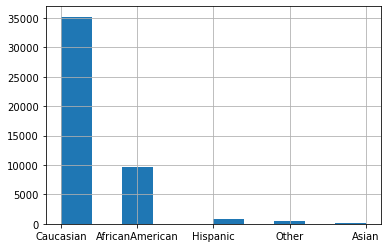

In [26]:
DM_repeat_patients['race'].hist()

In [27]:
DM_repeat_patients.head()

,patient_nbr,encounter_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Count
101385,88785891,438529178,Caucasian,Female,[20-30),3,7,4,3,OG,Psychology,9,0,8,2,3,9,296,305,292,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,<30,40
78882,88785891,241426656,Caucasian,Female,[20-30),1,1,7,3,OG,Surgery-General,70,0,14,0,4,10,250.13,305,242,4,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30,40
97732,88785891,392073212,Caucasian,Female,[20-30),1,1,7,3,OG,Emergency/Trauma,34,0,12,2,4,10,250.13,276,276,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,40
65667,88785891,183194856,Caucasian,Female,[20-30),1,1,7,2,OG,Emergency/Trauma,41,0,12,2,2,11,250.11,305,296,4,None,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,40
82693,88785891,257757342,Caucasian,Female,[20-30),2,7,7,2,OG,Emergency/Trauma,1,0,15,1,5,11,780,250.03,784,8,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,40


In [28]:
#DM_repeat_patients = DM_repeat_patients[DM_repeat_patients['patient_nbr'].isin(DM_repeat_patients['patient_nbr'].unique())]

In [29]:
#DM_repeat_patients.head()

In [30]:
small_DM_repeat_patients = DM_repeat_patients[['patient_nbr','race']]

In [31]:
small_DM_repeat_patients.head()

,patient_nbr,race
101385,88785891,Caucasian
78882,88785891,Caucasian
97732,88785891,Caucasian
65667,88785891,Caucasian
82693,88785891,Caucasian


In [32]:
con = []
for nbr in small_DM_repeat_patients['patient_nbr'].unique():
    con.append(small_DM_repeat_patients.index[small_DM_repeat_patients['patient_nbr']== nbr])
#print(con)
ber = []
for i in con:
    for m in i:
        ber.append(m)
#print(ber)

[101385, 78882, 97732, 65667, 82693, 89964, 45986, 87063, 72068, 40252, 79467, 52057, 87854, 74876, 76907, 91444, 51519, 71029, 40661, 50167, 97433, 50393, 50773, 79202, 60263, 67968, 38307, 88392, 99950, 45147, 76525, 44515, 78355, 75267, 54497, 90913, 62759, 74405, 63165, 53771, 72990, 85340, 70881, 72131, 41140, 71226, 72473, 70538, 88134, 44802, 82337, 86587, 78415, 81160, 40805, 41560, 84694, 71730, 82692, 87384, 86236, 78116, 54281, 40232, 80551, 88075, 83914, 76790, 49014, 58070, 43223, 30779, 46440, 39345, 36561, 36695, 52616, 38030, 32852, 31876, 37348, 32012, 45435, 40198, 57073, 62324, 55500, 38822, 41964, 43880, 29631, 8972, 21360, 1349, 16005, 23447, 12206, 12955, 15442, 2954, 17079, 6780, 7704, 3510, 24847, 24042, 19463, 944, 8547, 25767, 25344, 1077, 269, 14085, 93941, 95513, 69744, 88114, 68344, 66598, 84669, 86337, 84221, 101658, 45817, 76708, 59212, 60126, 83477, 97922, 82479, 46512, 80153, 64102, 87183, 85857, 90937, 65011, 59808, 88940, 60834, 97996, 56118, 83687, 9

In [33]:
len(ber)

46401

In [34]:
slm= []
for inde in ber:
    slm.append(small_DM_repeat_patients.loc[inde, 'race'])
#print(slm)    

['Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'Caucasian', 'AfricanAmerican', 'AfricanAmerican', 'AfricanAmerican', 'AfricanAmerican', 'AfricanAmerican', 'AfricanAmerican', '

In [35]:
nbrs = []
for nbr in small_DM_repeat_patients['patient_nbr']:
    nbrs.append(nbr)
#print(nbrs)

[88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 88785891, 43140906, 43140906, 43140906, 43140906, 43140906, 43140906, 43140906, 43140906, 43140906, 43140906, 43140906, 43140906, 43140906, 43140906, 43140906, 43140906, 43140906, 43140906, 43140906, 43140906, 43140906, 43140906, 43140906, 43140906, 43140906, 43140906, 43140906, 43140906, 23199021, 1660293, 23199021, 1660293, 23199021, 1660293, 88227540, 88227540, 1660293, 88227540, 88227540, 88227540, 88227540, 23199021, 1660293, 23199021, 23199021, 88227540, 1660293, 1660293, 23199021, 1660293, 88227540, 88227540, 23199021, 1660293, 23199021, 23199021, 23199021, 88227540, 1660293, 23199021, 1660293, 

In [36]:
lst_com = zip(nbrs, slm)

In [37]:
mxd_list = list(lst_com)
#print(mxd_list)

[(88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'), (88785891, 'Caucasian'),

In [38]:
final  = list(set(mxd_list))
#final

[(86376672, 'Caucasian'),
 (61196148, 'Caucasian'),
 (92068227, 'Hispanic'),
 (33181317, 'Caucasian'),
 (42095295, 'Caucasian'),
 (64193292, 'Caucasian'),
 (65195397, 'Caucasian'),
 (35457480, 'AfricanAmerican'),
 (35836272, 'Caucasian'),
 (103412286, 'AfricanAmerican'),
 (65989332, 'Caucasian'),
 (24425712, 'AfricanAmerican'),
 (33565950, 'Caucasian'),
 (1032462, 'Caucasian'),
 (70848837, 'Caucasian'),
 (78464439, 'Caucasian'),
 (35186508, 'Caucasian'),
 (2795418, 'Caucasian'),
 (42426837, 'Caucasian'),
 (23922657, 'Caucasian'),
 (91737171, 'Hispanic'),
 (56686491, 'Caucasian'),
 (23334750, 'AfricanAmerican'),
 (42622362, 'Caucasian'),
 (107402409, 'Caucasian'),
 (89008731, 'Caucasian'),
 (139633322, 'AfricanAmerican'),
 (43978941, 'Caucasian'),
 (58756266, 'Caucasian'),
 (4996530, 'Caucasian'),
 (59064426, 'Caucasian'),
 (76576653, 'Caucasian'),
 (10629963, 'Caucasian'),
 (97558569, 'Caucasian'),
 (15772725, 'AfricanAmerican'),
 (37719162, 'Caucasian'),
 (3349953, 'AfricanAmerican'),

In [39]:
id_and_race = pd.DataFrame(final, columns =['patient_num', 'RACE'])

In [40]:
id_and_race.head()

,patient_num,RACE
0,86376672,Caucasian
1,61196148,Caucasian
2,92068227,Hispanic
3,33181317,Caucasian
4,42095295,Caucasian


<AxesSubplot:>

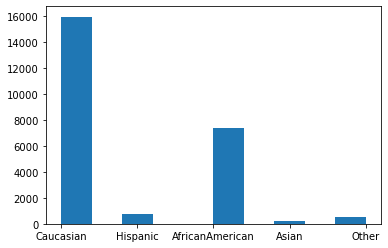

In [91]:
id_and_race['RACE'].hist(grid=False)

In [42]:
print(len(id_and_race['patient_num'].unique()))

16576


In [99]:
#id_and_race.sort_values(by='patient_num')

In [101]:
#unique values for 'patient_num'  are  16576. I was expecting my data frame to be of shape (16576,2),
#however it is (24834,2). Upon eyeballing and inspecting the data frame, I found there were different races sharing
#the same patient_num which shouldn't be the case as each patient_num is unique to a patient.Following examples
#illustrate this as for instance the patient_num 103140 is shared by 4 classes of race.

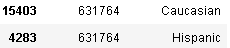

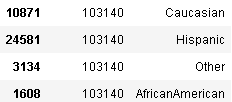

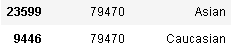

In [98]:
id_and_race.shape

(24834, 2)